1000.0 MHz
2.7939677238464355


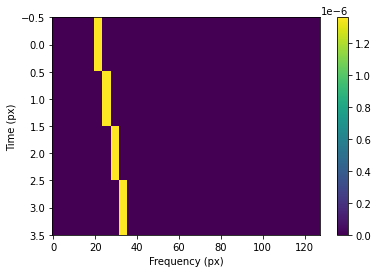

/home/cho134/.local/lib/python3.9/site-packages/blimpy/utils.py:11: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(x + offset)


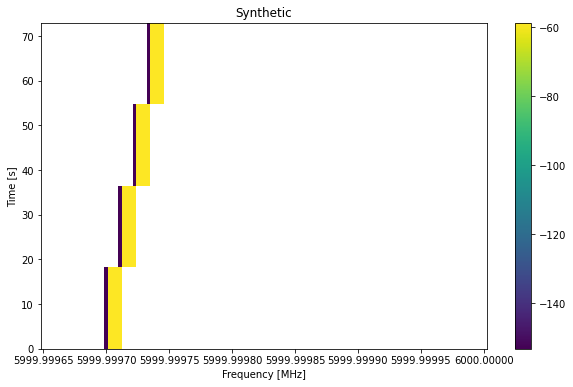

In [3]:
import setigen as stg
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline


drift_factor = 4
fr = stg.Frame(shape=(4, 128))
print(1000*u.MHz)
drift_rate = drift_factor * fr.unit_drift_rate
#drift_rate = 0.2*u.Hz/u.s

fr.add_signal(stg.constant_path(f_start=5999.99970*u.MHz,
                                drift_rate=drift_rate),
              stg.constant_t_profile(level=1),
              stg.gaussian_f_profile(width=0.5*u.Hz),
              doppler_smearing=True,
              smearing_subsamples=drift_factor)

print(fr.df)

fr.plot()
plt.show()
plt.figure(figsize=(10,6))
fr.bl_plot()
plt.show()

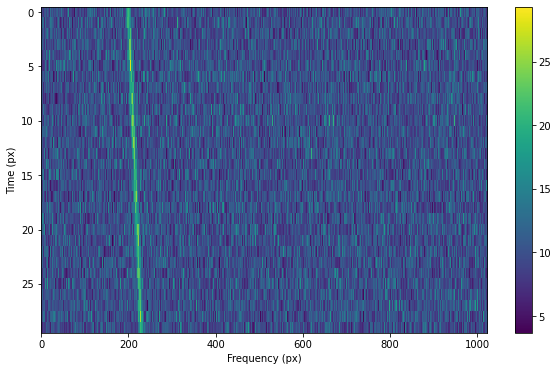

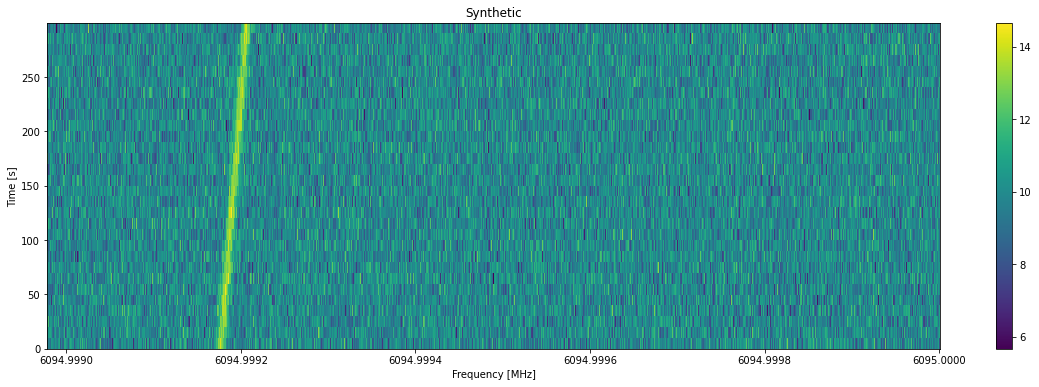

In [41]:
from astropy import units as u
import setigen as stg
import matplotlib.pyplot as plt

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=30*u.pixel,
                  df=1*u.Hz,
                  dt=10*u.s,
                  fch1=6095*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
                                            drift_rate=(0.1)*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=8*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.plot()
plt.show()

fig = plt.figure(figsize=(20, 6))
frame.bl_plot()
plt.show()

In [44]:
frame.save_h5(filename='SETIFrame.h5')

blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for SETIFrame.h5 without blobbing.
blimpy.waterfall INFO     Conversion time: 0.01sec


In [45]:
frame.save_h5(filename='SETIFrame.h5')

import time
from blimpy import Waterfall
from turbo_seti.find_doppler.find_doppler import FindDoppler

H5DIR = "/datax2/users/icrar2021/cho134/fdmt-test/TurboSETI/"
H5PATH = H5DIR + "SETIFrame.h5"
OUT_DIR_BASE = H5DIR

print("\nUsing HDF5 file: {}\nHeader and data shape:".format(H5PATH))
# -- Get a report of header and data shape
wf = Waterfall(H5PATH)
#wf.header['foff'] = 1e-6
wf.info()
# -- Instantiate FindDoppler.
print("\nInstantiating the FindDoppler object.")
fdop = FindDoppler(datafile=H5PATH, max_drift=4, snr=30, out_dir=H5DIR)
# -- Search for hits and report elapsed time.
print("\nBegin doppler search.  Please wait ...")
t1 = time.time()
fdop.search()
elapsed_time = time.time() - t1
print("\nFindDoppler.search() elapsed time = {} seconds".format(elapsed_time))


Using HDF5 file: /datax2/users/icrar2021/cho134/fdmt-test/TurboSETI/SETIFrame.h5
Header and data shape:

--- File Info ---
DIMENSION_LABELS :   ['time' 'feed_id' 'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :                       6095.0 MHz
            foff :                       -1e-06 MHz
           ibeam :                               -1
      machine_id :                               20
          nbeams :                                1
           nbits :                               32
          nchans :                             1024
            nifs :                                1
     rawdatafile :                        Synthetic
     source_name :                        Synthetic
         src_dej :                     -28:22:59.16
         src_raj :                         17:47:15
    telescope_id :                                6
           tsamp :                          

In [25]:
cd TurboSETI

/datax2/users/icrar2021/cho134/fdmt-test/TurboSETI


In [ ]:
fb = Waterfall('/datax2/users/icrar2021/cho134/fdmt-test/TurboSETI/Voyager1.single_coarse.fine_res.h5',f_start=8419.1,f_stop=8419.3)
plt.figure(figsize=(10,6))
fb.plot_waterfall()

In [ ]:
from blimpy import Waterfall
import matplotlib.pyplot as plt

%matplotlib inline
fb = Waterfall('/datax2/users/icrar2021/cho134/fdmt-test/TurboSETI/linear_custom_signal.rawspec.0000.h5',f_start=6001.0,f_stop=6003.0)
plt.figure(figsize=(10,6))
fb.plot_waterfall()

In [ ]:
fb = Waterfall('/datax2/users/icrar2021/cho134/fdmt-test/TurboSETI/linear_custom_signal.rawspec.0000.fil',f_start=6001.0,f_stop=6003.0)
plt.figure(figsize=(10,6))
fb.plot_waterfall()

In [ ]:
#!wget http://blpd0.ssl.berkeley.edu/Voyager_data/Voyager1.single_coarse.fine_res.h5